In [7]:
import numpy as np
import matplotlib.pyplot as plt

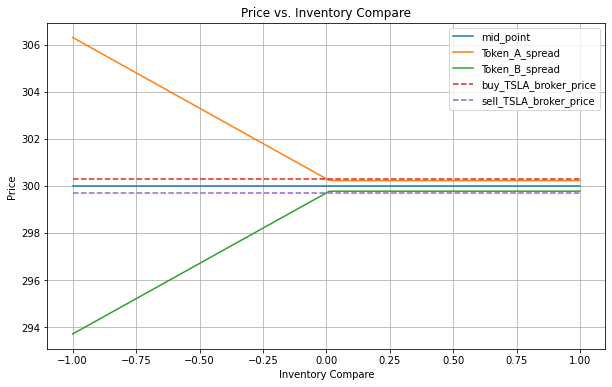

In [12]:
## Spreads

#below section is commented beacause for this analysis we take in different values but below shows to calculate it

#Token_A_inventory = 10
#Token_B_inventory = 3000

#Initialize the start inventories, start inventory will be updated each week and be used to compare current standings against
#Token_A_inventory_start = 10
#Token_B_inventory_start = 3000

#Calculate the percentage change
#Token_A_inventory_compare = ((Token_A_inventory - Token_A_inventory_start) / Token_A_inventory_start)
#Token_B_inventory_compare = ((Token_B_inventory - Token_B_inventory_start) / Token_B_inventory_start)

# Function to calculate Token_A_spread and Token_B_spread
def calculate_spreads(Token_A_inventory_compare, Token_B_inventory_compare):
    A_spread_function = Token_A_inventory_compare * 0.02
    B_spread_function = Token_B_inventory_compare * 0.02

    Token_A_spread = (
        mid_price + (mid_price * 0.00075) if buy_TSLA_broker_price - (buy_TSLA_broker_price * A_spread_function) < mid_price + (mid_price * 0.00075)
        else buy_TSLA_broker_price - (buy_TSLA_broker_price * A_spread_function)
    )

    Token_B_spread = (
        mid_price - (mid_price * 0.00075) if sell_TSLA_broker_price + (sell_TSLA_broker_price * B_spread_function) > mid_price - (mid_price * 0.00075)
        else sell_TSLA_broker_price + (sell_TSLA_broker_price * B_spread_function)
    )

    return Token_A_spread, Token_B_spread

# Constants
buy_TSLA_broker_price = 300 + (300 * 0.001)
sell_TSLA_broker_price = 300 - (300 * 0.001)

mid_price = (buy_TSLA_broker_price + sell_TSLA_broker_price) / 2

# Create a range of values for Token_A_inventory_compare and Token_B_inventory_compare
inventory_compare_values = np.linspace(-1, 1, 100)

# Calculate Token_A_spread, Token_B_spread, and mid_point for the entire range of inventory_compare_values
Token_A_spreads, Token_B_spreads = zip(*[calculate_spreads(Token_A_inv, Token_B_inv) for Token_A_inv, Token_B_inv in zip(inventory_compare_values, inventory_compare_values)])
mid_points = [mid_price] * len(inventory_compare_values)

# Create curves for buy_TSLA_broker_price and sell_TSLA_broker_price
buy_prices = [buy_TSLA_broker_price] * len(inventory_compare_values)
sell_prices = [sell_TSLA_broker_price] * len(inventory_compare_values)

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(inventory_compare_values, mid_points, label='mid_point')
plt.plot(inventory_compare_values, Token_A_spreads, label='Token_A_spread')
plt.plot(inventory_compare_values, Token_B_spreads, label='Token_B_spread')
plt.plot(inventory_compare_values, buy_prices, label='buy_TSLA_broker_price', linestyle='--')
plt.plot(inventory_compare_values, sell_prices, label='sell_TSLA_broker_price', linestyle='--')
plt.xlabel('Inventory Compare')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs. Inventory Compare')
plt.grid(True)
plt.show()





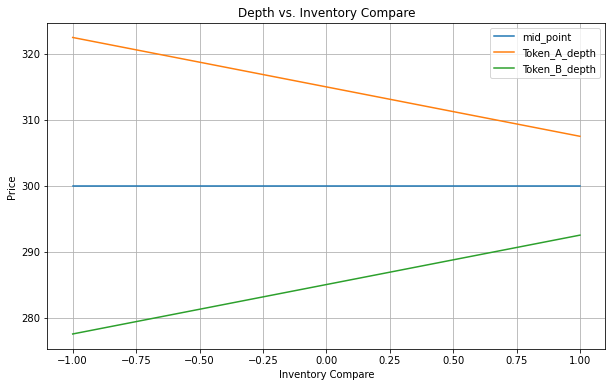

In [9]:
##depth

def calculate_depth(Token_A_inventory_compare, Token_B_inventory_compare):
    # Define depth percentage range
    min_depth_percentage = 0.025  # 2.5%
    max_depth_percentage = 0.075  # 12.5%
    
    # Calculate depth as a function of inventory compare
    # mid price will change to the spread start when integrating them together 
    Token_A_depth = mid_price + (mid_price * (min_depth_percentage + (max_depth_percentage - min_depth_percentage) * (1 - Token_A_inventory_compare) / 2))
    Token_B_depth = mid_price - (mid_price * (min_depth_percentage + (max_depth_percentage - min_depth_percentage) * (1 - Token_B_inventory_compare) / 2))

    return Token_A_depth, Token_B_depth

# Constants
# Define other constants as needed
mid_price = 300  # Assuming a constant mid_price for simplicity

# Create a range of values for Token_A_inventory_compare and Token_B_inventory_compare
inventory_compare_values = np.linspace(-1, 1, 100)

# Calculate Token_A_depth and Token_B_depth for the entire range of inventory_compare_values
Token_A_depths, Token_B_depths = zip(*[calculate_depth(Token_A_inv, Token_B_inv) for Token_A_inv, Token_B_inv in zip(inventory_compare_values, inventory_compare_values)])

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(inventory_compare_values, mid_points, label='mid_point')
plt.plot(inventory_compare_values, Token_A_depths, label='Token_A_depth')
plt.plot(inventory_compare_values, Token_B_depths, label='Token_B_depth')
plt.xlabel('Inventory Compare')
plt.ylabel('Price')
plt.legend()
plt.title('Depth vs. Inventory Compare')
plt.grid(True)
plt.show()


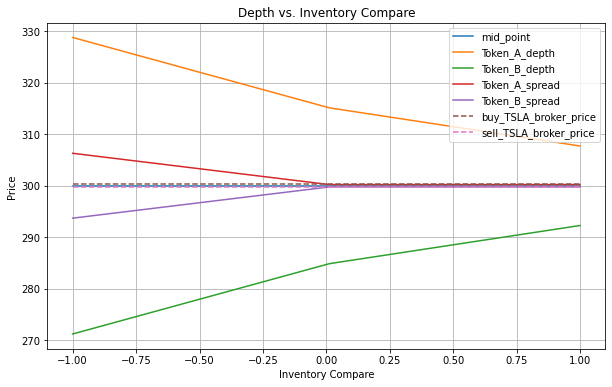

In [13]:
##spread + depth

# Function to calculate Token_A_spread and Token_B_spread
def calculate_spreads(Token_A_inventory_compare, Token_B_inventory_compare):
    A_spread_function = Token_A_inventory_compare * 0.02
    B_spread_function = Token_B_inventory_compare * 0.02

    Token_A_spread = (
        mid_price + (mid_price * 0.00075) if buy_TSLA_broker_price - (buy_TSLA_broker_price * A_spread_function) < mid_price + (mid_price * 0.00075)
        else buy_TSLA_broker_price - (buy_TSLA_broker_price * A_spread_function)
    )

    Token_B_spread = (
        mid_price - (mid_price * 0.00075) if sell_TSLA_broker_price + (sell_TSLA_broker_price * B_spread_function) > mid_price - (mid_price * 0.00075)
        else sell_TSLA_broker_price + (sell_TSLA_broker_price * B_spread_function)
    )

    return Token_A_spread, Token_B_spread

# Constants
buy_TSLA_broker_price = 300 + (300 * 0.001)
sell_TSLA_broker_price = 300 - (300 * 0.001)
mid_price = (buy_TSLA_broker_price + sell_TSLA_broker_price) / 2

# Create a range of values for Token_A_inventory_compare and Token_B_inventory_compare
inventory_compare_values = np.linspace(-1, 1, 100)

# Calculate Token_A_spread, Token_B_spread, and mid_point for the entire range of inventory_compare_values
Token_A_spreads, Token_B_spreads = zip(*[calculate_spreads(Token_A_inv, Token_B_inv) for Token_A_inv, Token_B_inv in zip(inventory_compare_values, inventory_compare_values)])
mid_points = [mid_price] * len(inventory_compare_values)

# Create curves for buy_TSLA_broker_price and sell_TSLA_broker_price
buy_prices = [buy_TSLA_broker_price] * len(inventory_compare_values)
sell_prices = [sell_TSLA_broker_price] * len(inventory_compare_values)

def calculate_depth(Token_A_inventory_compare, Token_B_inventory_compare,Token_A_spread,Token_B_spread):
    # Define depth percentage range
    min_depth_percentage = 0.025  # 2.5%
    max_depth_percentage = 0.075  # 12.5%
    
    # Calculate depth as a function of inventory compare
    # mid price has changed to the spread start when integrating them together 
    Token_A_depth = Token_A_spread + (mid_price * (min_depth_percentage + (max_depth_percentage - min_depth_percentage) * (1 - Token_B_inventory_compare) / 2))
    Token_B_depth = Token_B_spread - (mid_price * (min_depth_percentage + (max_depth_percentage - min_depth_percentage) * (1 - Token_A_inventory_compare) / 2))
    
    return Token_A_depth, Token_B_depth

# Constants
# Define other constants as needed
mid_price = 300  # Assuming a constant mid_price for simplicity

# Create a range of values for Token_A_inventory_compare and Token_B_inventory_compare
inventory_compare_values = np.linspace(-1, 1, 100)

# Calculate Token_A_depth and Token_B_depth for the entire range of inventory_compare_values
Token_A_depths, Token_B_depths = zip(*[calculate_depth(Token_A_inv, Token_B_inv, Token_A_spread, Token_B_spread) for Token_A_inv, Token_B_inv, Token_A_spread, Token_B_spread in zip(inventory_compare_values, inventory_compare_values, Token_A_spreads, Token_B_spreads)])

# Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(inventory_compare_values, mid_points, label='mid_point')
plt.plot(inventory_compare_values, Token_A_depths, label='Token_A_depth')
plt.plot(inventory_compare_values, Token_B_depths, label='Token_B_depth')
plt.plot(inventory_compare_values, Token_A_spreads, label='Token_A_spread')
plt.plot(inventory_compare_values, Token_B_spreads, label='Token_B_spread')
plt.plot(inventory_compare_values, buy_prices, label='buy_TSLA_broker_price', linestyle='--')
plt.plot(inventory_compare_values, sell_prices, label='sell_TSLA_broker_price', linestyle='--')
plt.xlabel('Inventory Compare')
plt.ylabel('Price')
plt.legend()
plt.title('Depth vs. Inventory Compare')
plt.grid(True)
plt.show()

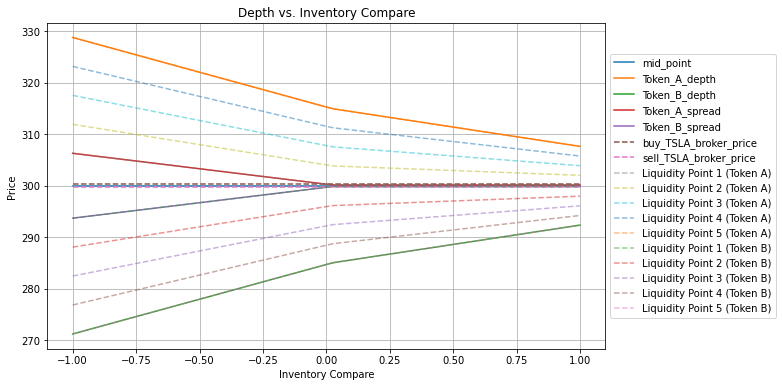

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code)

# Define Token_A_inventory and Token_B_inventory
Token_A_inventory = 10
Token_B_inventory = 3000

# Initialize lists to store liquidity points for Token A and Token B
liquidity_points_A = []
liquidity_points_B = []

# Create a separate set of x-values for the liquidity points
liquidity_x_values = np.linspace(-1, 1, 100)

# Loop through each combination of inventory compare values
for Token_A_inv, Token_B_inv, Token_A_spread, Token_B_spread, Token_A_depth, Token_B_depth in zip(inventory_compare_values, inventory_compare_values, Token_A_spreads, Token_B_spreads, Token_A_depths, Token_B_depths):
    # Calculate the difference between spread and depth for Token A and Token B
    Token_A_spread_depth_diff = Token_A_depth - Token_A_spread
    Token_B_spread_depth_diff = Token_B_depth - Token_B_spread

    # Divide the difference by 4 to get the increment for placing liquidity
    increment_A = Token_A_spread_depth_diff / 4  # Increment for Token A
    increment_B = Token_B_spread_depth_diff / 4  # Increment for Token B

    # Initialize variables to store liquidity points for Token A
    liquidity_points_A_i = []

    # Initialize variables to store liquidity points for Token B
    liquidity_points_B_i = []

    # Initialize current liquidity for Token A and Token B
    current_liquidity_A = Token_A_inventory  # Use Token_A_inventory as the initial liquidity for Token A
    current_liquidity_B = Token_B_inventory  # Use Token_B_inventory as the initial liquidity for Token B

    # Calculate liquidity points for Token A
    liquidity_1_A = Token_A_spread + increment_A * 0
    current_liquidity_A -= current_liquidity_A / 5
    liquidity_points_A_i.append(liquidity_1_A)
    liquidity_2_A = Token_A_spread + increment_A * 1
    current_liquidity_A -= current_liquidity_A / 5
    liquidity_points_A_i.append(liquidity_2_A)
    liquidity_3_A = Token_A_spread + increment_A * 2
    current_liquidity_A -= current_liquidity_A / 5
    liquidity_points_A_i.append(liquidity_3_A)
    liquidity_4_A = Token_A_spread + increment_A * 3
    current_liquidity_A -= current_liquidity_A / 5
    liquidity_points_A_i.append(liquidity_4_A)
    liquidity_5_A = Token_A_spread + increment_A * 4
    current_liquidity_A -= current_liquidity_A / 5
    liquidity_points_A_i.append(liquidity_5_A)

    # Calculate liquidity points for Token B
    liquidity_1_B = Token_B_spread + increment_B * 0
    current_liquidity_B -= current_liquidity_B / 5
    liquidity_points_B_i.append(liquidity_1_B)
    liquidity_2_B = Token_B_spread + increment_B * 1
    current_liquidity_B -= current_liquidity_B / 5
    liquidity_points_B_i.append(liquidity_2_B)
    liquidity_3_B = Token_B_spread + increment_B * 2
    current_liquidity_B -= current_liquidity_B / 5
    liquidity_points_B_i.append(liquidity_3_B)
    liquidity_4_B = Token_B_spread + increment_B * 3
    current_liquidity_B -= current_liquidity_B / 5
    liquidity_points_B_i.append(liquidity_4_B)
    liquidity_5_B = Token_B_spread + increment_B * 4
    current_liquidity_B -= current_liquidity_B / 5
    liquidity_points_B_i.append(liquidity_5_B)

    # Append liquidity points for Token A and Token B
    liquidity_points_A.append(liquidity_points_A_i)
    liquidity_points_B.append(liquidity_points_B_i)

# ... (rest of the code)

# Plot the curves and liquidity points
plt.figure(figsize=(10, 6))
plt.plot(inventory_compare_values, mid_points, label='mid_point')
plt.plot(inventory_compare_values, Token_A_depths, label='Token_A_depth')
plt.plot(inventory_compare_values, Token_B_depths, label='Token_B_depth')
plt.plot(inventory_compare_values, Token_A_spreads, label='Token_A_spread')
plt.plot(inventory_compare_values, Token_B_spreads, label='Token_B_spread')
plt.plot(inventory_compare_values, buy_prices, label='buy_TSLA_broker_price', linestyle='--')
plt.plot(inventory_compare_values, sell_prices, label='sell_TSLA_broker_price', linestyle='--')

# Plot liquidity points for Token A
for i in range(5):
    plt.plot(liquidity_x_values, [liquidity_points_A[j][i] for j in range(len(inventory_compare_values))], linestyle='--', alpha=0.5, label=f'Liquidity Point {i+1} (Token A)')

# Plot liquidity points for Token B
for i in range(5):
    plt.plot(liquidity_x_values, [liquidity_points_B[j][i] for j in range(len(inventory_compare_values))], linestyle='--', alpha=0.5, label=f'Liquidity Point {i+1} (Token B)')

plt.xlabel('Inventory Compare')
plt.ylabel('Price')

# Move the legend to the right of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Depth vs. Inventory Compare')
plt.grid(True)
plt.show()

